# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from pathlib import Path
load_dotenv()
# %matplotlib inline

True

In [5]:
# Read your api key environment variable
news_api = "2513143cbaaf40a3ac124571b6c48157"
# type(news_api)


In [6]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api)

In [7]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin", language="en",page_size=100, sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 4573


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
 'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
 'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
 'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
 'publishedAt': '2020-12-03T22:00:00Z',
 'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]'}

In [8]:
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines['articles'])
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Lifehacker.com'}","Mike Winters on Two Cents, shared by Mike Wint...",Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,https://twocents.lifehacker.com/is-the-new-vis...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-03T22:00:00Z,Visa has partnered with cryptocurrency startup...
1,"{'id': 'engadget', 'name': 'Engadget'}",Karissa Bell,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,https://www.engadget.com/paypal-opens-cryptocu...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-11-12T21:05:41Z,PayPal is bringing its newly-announced support...
2,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...",https://mashable.com/article/bitcoin-20000/,https://mondrian.mashable.com/2020%252F11%252F...,2020-11-20T20:02:17Z,"In November 2017, after an absolutely massive,..."
3,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,https://www.engadget.com/jd-com-supports-china...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-06T22:37:18Z,"Unlike ‘conventional’ cryptocurrencies, a cent..."
4,"{'id': None, 'name': 'Gizmodo.com'}",John Biggs,Bitcoin Could Hit $20K Again But This Time No ...,If you’ve been watching the crypto markets ove...,https://gizmodo.com/bitcoin-could-hit-20k-agai...,https://i.kinja-img.com/gawker-media/image/upl...,2020-11-25T23:00:00Z,If youve been watching the crypto markets over...


In [9]:
file_path = Path("../Data/")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [10]:
file_path = Path("../Data/")
bitcoin_df.to_pickle(file_path)

In [11]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum and Ethereum", language="en",page_size=100, sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1226


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": text,
 
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiments_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_sentiments_df = bitcoin_sentiments_df[cols]

bitcoin_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
2,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
3,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
4,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...


In [14]:
file_path = Path("../Data/")
bitcoin_sentiments_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [13]:
file_path = Path("../Data/")
bitcoin_sentiments_df.to_pickle(file_path)

In [14]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": text,
 
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sentiments_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_sentiments_df = ethereum_sentiments_df[cols]

ethereum_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
4,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ..."


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.157701,0.018475,0.925808,0.055727
std,0.327272,0.047462,0.077936,0.066120
min,-0.946800,0.000000,0.637000,0.000000
25%,0.000000,0.000000,0.860500,0.000000
50%,0.000000,0.000000,0.948000,0.050000
75%,0.411700,0.000000,1.000000,0.119000
max,0.877900,0.363000,1.000000,0.318000


In [16]:
# Describe the Ethereum Sentiment
ethereum_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.213371,0.021232,0.905121,0.073646
std,0.355953,0.043914,0.089745,0.078079
min,-0.670500,0.000000,0.653000,0.000000
25%,0.000000,0.000000,0.849000,0.000000
50%,0.177900,0.000000,0.923000,0.070000
75%,0.493900,0.000000,1.000000,0.126000
max,0.883400,0.196000,1.000000,0.347000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [19]:
Answer A :Ethereum has the higher mean positive score compared to Bitcoin, 0.073 vs. 0.056.
Answer B :Based on the descriptive statistics, Ethereum has the highest compound score that topped at 0.883 vs. the maximum compound score of 0.878 from Bitcoin.
However, Bitcoin has compound scores higher than Ethereum on its average, minimum, 25th, 50th and 75th percentiles.     

Answer C : Ethereum has the highest positive score with its maximum at 0.347 rather than the 0.318 received by Bitcoin.
Sentiments towards Ethereum are more volatile as the standard deviations are higher than those for Bitcoin on scores for compound, negative, neutral and positive texts.

SyntaxError: invalid syntax (<ipython-input-19-a8eff8e8f879>, line 1)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Code to download wordnet corpora
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mischelle.massey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
def tokenizer(text):
    """Tokenizes text."""
# Remove the punctuation
regex = re.compile("[^a-zA-Z ]")
clean_text = regex.sub('', text)
    
# Create a list of the words
sentence = sent_tokenize(clean_text)
words = []
for sent in sentence:
    word = word_tokenize(sent)
    words = words + word    
        
# Convert the words to lowercase
words_lc = [word.lower() for word in words]  


# Remove the stop words
sw = set(stopwords.words('english'))
words_sw = [word for word in words_lc if word not in sw]



In [20]:
print(words_sw)

['bitcoin', 'climbed', 'abovetopped', 'early', 'tuesday', 'first', 'time', 'since', 'january', 'pushing', 'years', 'remarkable', 'rally', 'yeartodate', 'basis', 'thats', 'times', 'standard', 'chars']


In [21]:
# Expand the default stopwords list if necessary
sw_addon = {"''", 'and','...','such', 'thus',"n't", "-", '""','_','upon','for','shall','just','onto'}

In [22]:
# Complete the tokenizer function
def tokenizer(Text):
    """Tokenizes text."""
    
    # Create a list of the words
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', Text)
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
#    tokens = [', '.join(output)] left to ngrams function
    
    return tokens


In [23]:
# Create a new tokens column for bitcoin
bitcoin_sentiments_df["Tokens"] = bitcoin_sentiments_df['Text'].apply(tokenizer)
bitcoin_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
2,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
3,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."
4,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."


In [24]:
file_path = Path("../Data/")
bitcoin_sentiments_df.to_pickle(file_path)

In [25]:
file_path = Path("../Data/")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [26]:
# Create a new tokens column for ethereum
ethereum_sentiments_df["Tokens"] = ethereum_sentiments_df['Text'].apply(tokenizer)
ethereum_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
4,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ...","[paypal, ha, launched, generosity, network, pl..."


In [27]:
file_path = Path("../Data/")
ethereum_sentiments_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [28]:
file_path = Path("../Data/")
ethereum_sentiments_df.to_pickle(file_path)

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from collections import Counter

In [30]:
# Define a bigram_counter function
def bigram_counter(tokens): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string) 
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['Bigram', 'Count'])

In [31]:
# Generate the Bitcoin N-grams where N=2
tokens_bitcoin = bitcoin_sentiments_df.Tokens.astype('str')

In [32]:
print(f'Top 10 Bitcoin Bigrams')
bigram_counter(tokens_bitcoin)

Top 10 Bitcoin Bigrams


,Bigram,Count
0,"(virtual, currency)",31
1,"(reuters, bitcoin)",26
2,"(representation, virtual)",23
3,"(currency, bitcoin)",23
4,"(illustration, taken)",23
5,"(char, reuters)",21
6,"(photo, representation)",20
7,"(bitcoin, seen)",19
8,"(reuters, stafffile)",13
9,"(stafffile, photo)",13


In [33]:
# Generate the Ethereum N-grams where N=2
tokens_ethereum = ethereum_sentiments_df.Tokens.astype('str')

In [34]:
print(f'Top 10 Ethereum Bigrams')
bigram_counter(tokens_ethereum)

Top 10 Ethereum Bigrams


,Bigram,Count
0,"(virtual, currency)",10
1,"(char, bitcoin)",10
2,"(photo, representation)",8
3,"(york, reuters)",7
4,"(representation, virtual)",7
5,"(currency, bitcoin)",7
6,"(illustration, taken)",7
7,"(reuters, bitcoin)",7
8,"(char, ethereum)",7
9,"(char, new)",6


In [35]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Get the top 10 words for Bitcoin
print(f'Top 10 Bitcoin Words')
token_count(tokens_bitcoin, N=10)

Top 10 Bitcoin Words


[("['reuters', 'stafffile', 'photo', 'representations', 'virtual', 'currency', 'bitcoin', 'placed', 'us', 'dollar', 'banknote', 'illustration', 'taken', 'may', 'reutersdado', 'ruvicillustrationlondon', 'reuters', 'char']",
  3),
 ("['london', 'reuters', 'inflation', 'hedge', 'currency', 'another', 'niche', 'asset', 'take', 'punt', 'bitcoin', 'headline', 'rekindling', 'debate', 'true', 'role', 'driver', 'behind', 'char']",
  3),
 ("['file', 'photo', 'representation', 'virtual', 'currency', 'bitcoin', 'seen', 'front', 'stock', 'graph', 'illustration', 'taken', 'november', 'reutersdado', 'ruvicreuters', 'bitcoin', 'still', 'volatile', 'char']",
  3),
 ("['new', 'york', 'reuters', 'bitcoin', 'investor', 'include', 'top', 'hedge', 'fund', 'money', 'manager', 'betting', 'virtual', 'currency', 'could', 'quintuple', 'high', 'yearfile', 'photo', 'b', 'char']",
  3),
 ("['shanghaihong', 'kong', 'reuters', 'price', 'bitcoin', 'soar', 'chinese', 'cryptocurrency', 'asset', 'manager', 'looking', 'ex

In [37]:
# Get the top 10 words for Ethereum
print(f'Top 10 Ethereum Words')
token_count(tokens_ethereum, N=10)

Top 10 Ethereum Words


[("['file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'reutersdado', 'ruvicillustrationlondon', 'reuters', 'char']",
  2),
 ("['new', 'york', 'reuters', 'institutional', 'investor', 'pumped', 'million', 'cryptocurrency', 'fund', 'product', 'week', 'ended', 'dec', 'second', 'highest', 'record', 'pushing', 'sector', 'asset', 'manag', 'char']",
  2),
 ("['reuters', 'stafffile', 'photo', 'representation', 'virtual', 'currency', 'bitcoin', 'seen', 'front', 'stock', 'graph', 'illustration', 'taken', 'november', 'reutersdado', 'ruvicillustrationfile', 'photo', 'char']",
  2),
 ("['reuters', 'staffa', 'representation', 'virtual', 'currency', 'bitcoin', 'seen', 'illustration', 'taken', 'november', 'reutersdado', 'ruvicillustrationnew', 'york', 'reuters', 'bitcoin', 'btcbtsp', 'rose', 'n', 'char']",
  2),
 ("['london', 'reuters', 'bitcoin', 'passed', 'tuesday', 'touch', 'highest', 'level', 'year',

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mischelle.massey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\mischelle.massey\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mischelle.massey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mischelle.massey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


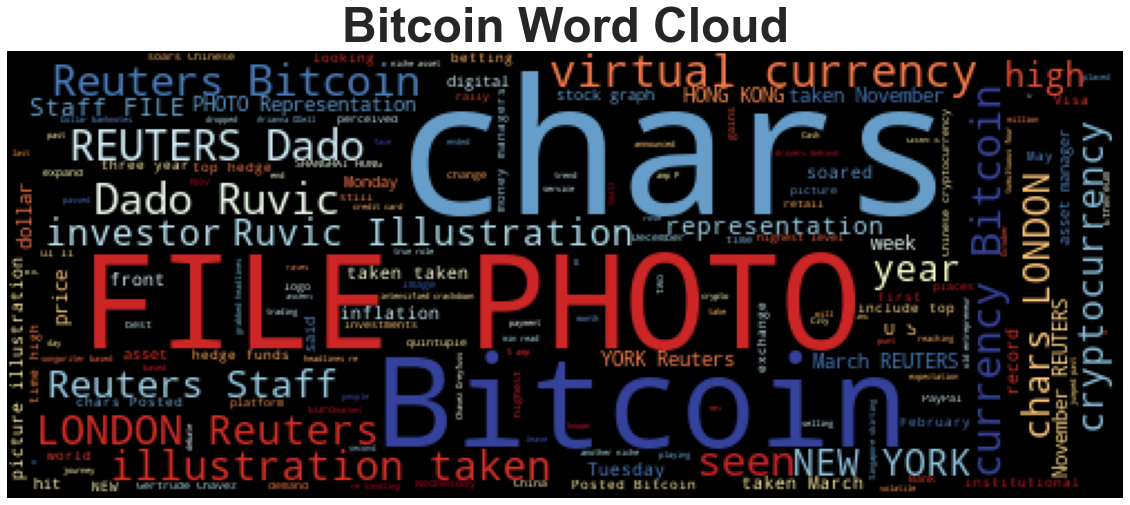

In [39]:
# Generate the Bitcoin word cloud
# corpus = bitcoin_headlines["articles"]

def wordCloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
wordCloud(bitcoin_sentiments_df.Text.str.cat(), title="Bitcoin Word Cloud")

#bitcoin_sentiments_df

   
    
   # wc = WordCloud().generate(input_text)


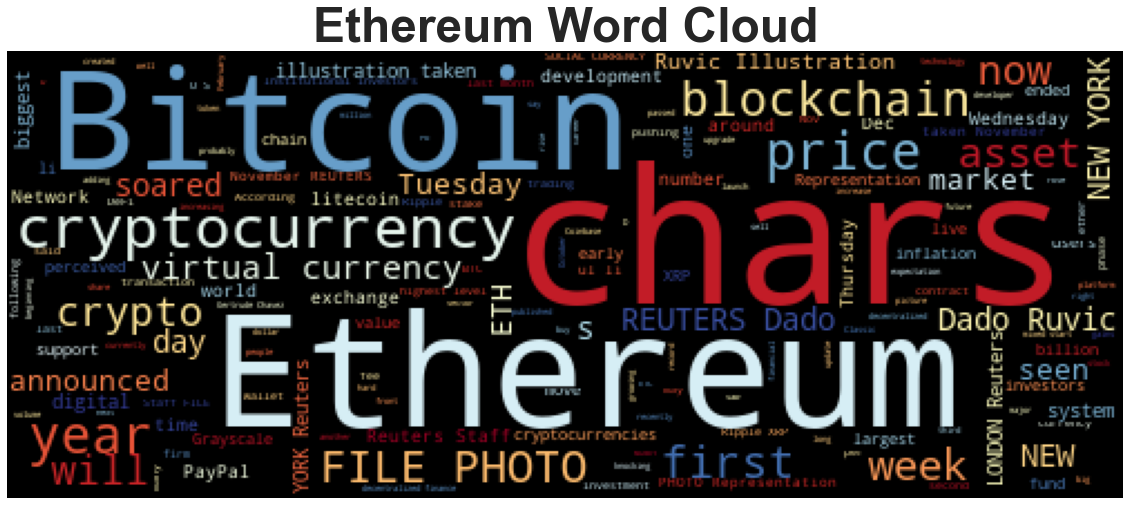

In [42]:
# Generate the Ethereum word cloud

def wordCloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
wordCloud(ethereum_sentiments_df.Text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [43]:
import spacy
from spacy import displacy

In [44]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [49]:
# Concatenate all of the bitcoin text together
text_strings_bitcoin = bitcoin_sentiments_df.Text.astype('str')
text_bitcoin = ' '.join(text_strings_bitcoin)
text_bitcoin[:500]

'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin'

In [50]:
# Run the NER processor on all of the text
doc_bitcoin = nlp(text_bitcoin)

# Add a title to the document
doc_bitcoin.user_data['title'] = 'Bitcoin NER'

In [52]:
# Render the visualization
bitcoin_entities = displacy.render(doc_bitcoin, style='ent', jupyter=True)

In [53]:
# List all Entities
for ent in doc_bitcoin.ents:
    print(ent.text, ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Justin HarperBusiness ORG
BBC News ORG
Bitcoin GPE
above $17,000 MONEY
12,800 MONEY
three-year DATE
Bitcoin GPE
this week DATE
Reuters ORG
Bitcoin GPE
November 19, 2020 D

---

## Ethereum NER

In [54]:
# Concatenate all of the bitcoin text together
text_strings_ethereum = ethereum_sentiments_df.Text.astype('str')
text_ethereum = ' '.join(text_strings_ethereum)
text_ethereum[:500]

'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on'

In [55]:
# Run the NER processor on all of the text
doc_ethereum = nlp(text_ethereum)

# Add a title to the document
doc_ethereum.user_data['title'] = 'Ethereum NER'

In [56]:
# Render the visualization
displacy.render(doc_ethereum, style='ent', jupyter=True)

In [57]:
# List all Entities
for ent in doc_ethereum.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Paypal ORG
1 CARDINAL
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitco